In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

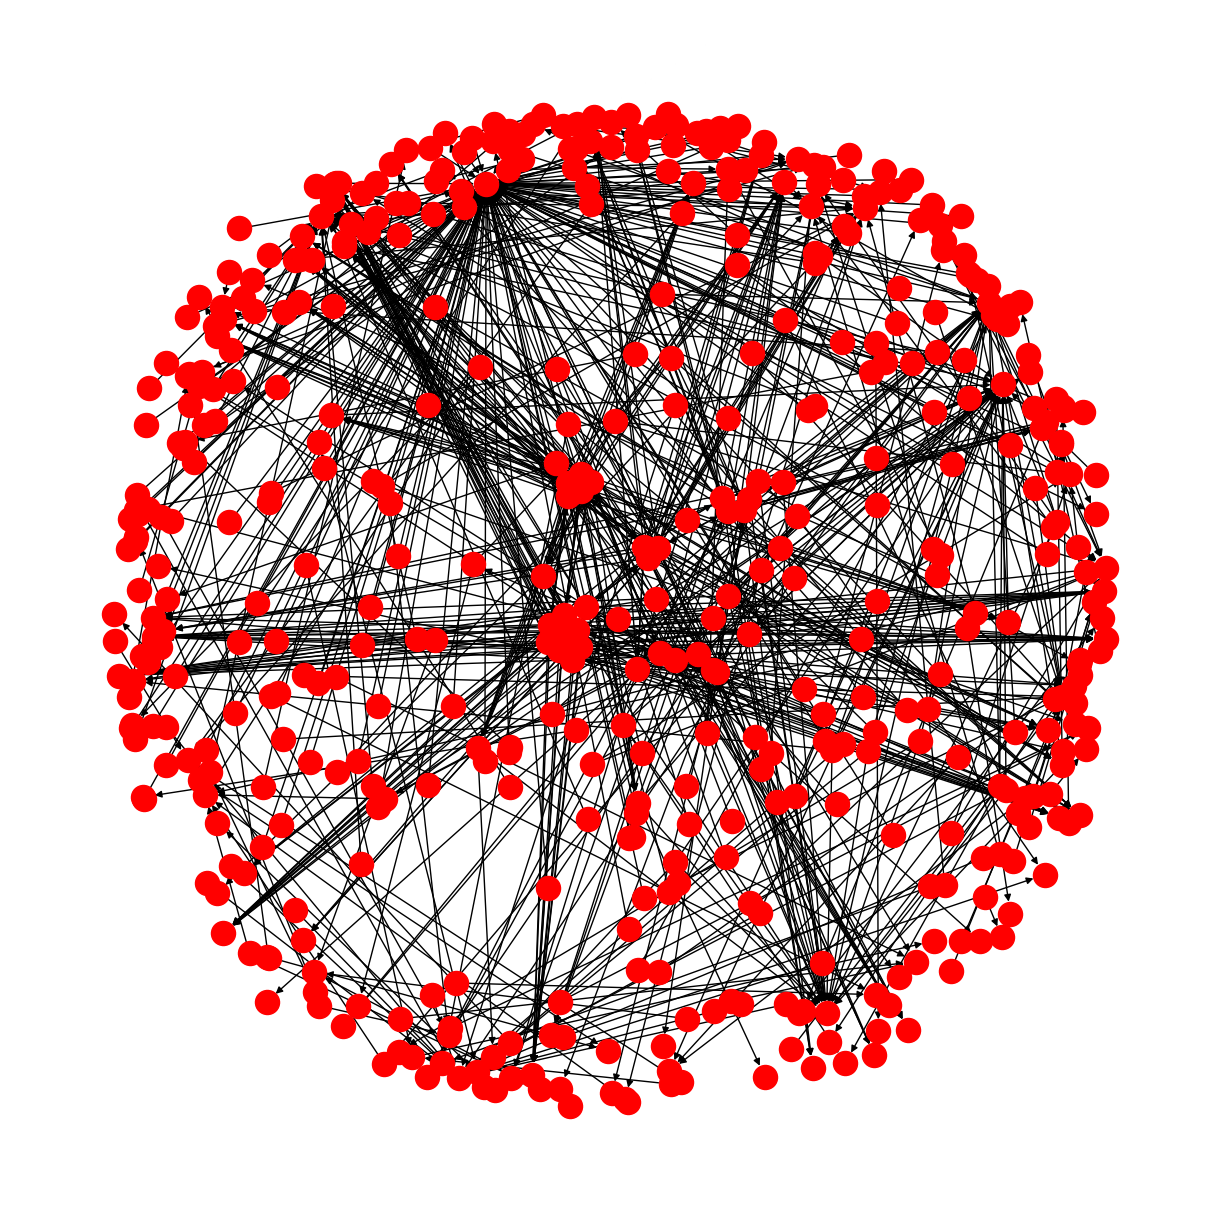

In [2]:
kg_df = pd.read_csv("./Knowledge_Graph.csv", sep='\t', dtype=str)

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G, k=0.5)
nx.draw(G, with_labels=False, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

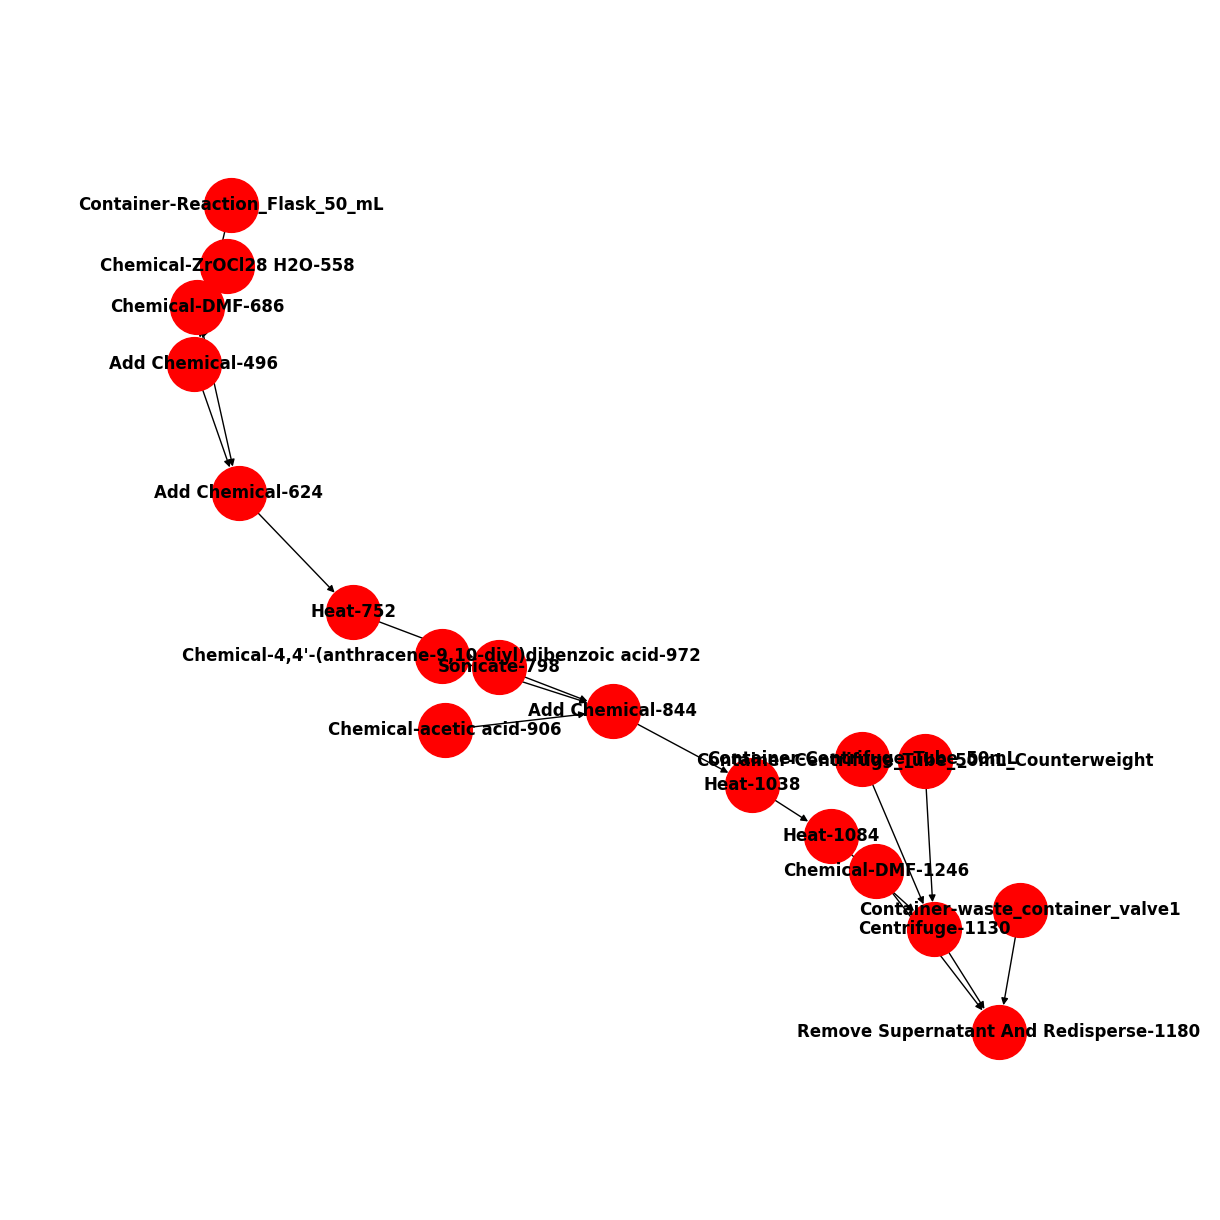

In [3]:
kg_df = pd.read_csv("./Knowledge_Graph.csv", sep='\t', dtype=str)

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="is_used_by"], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.2)

nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')

axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])

plt.show()

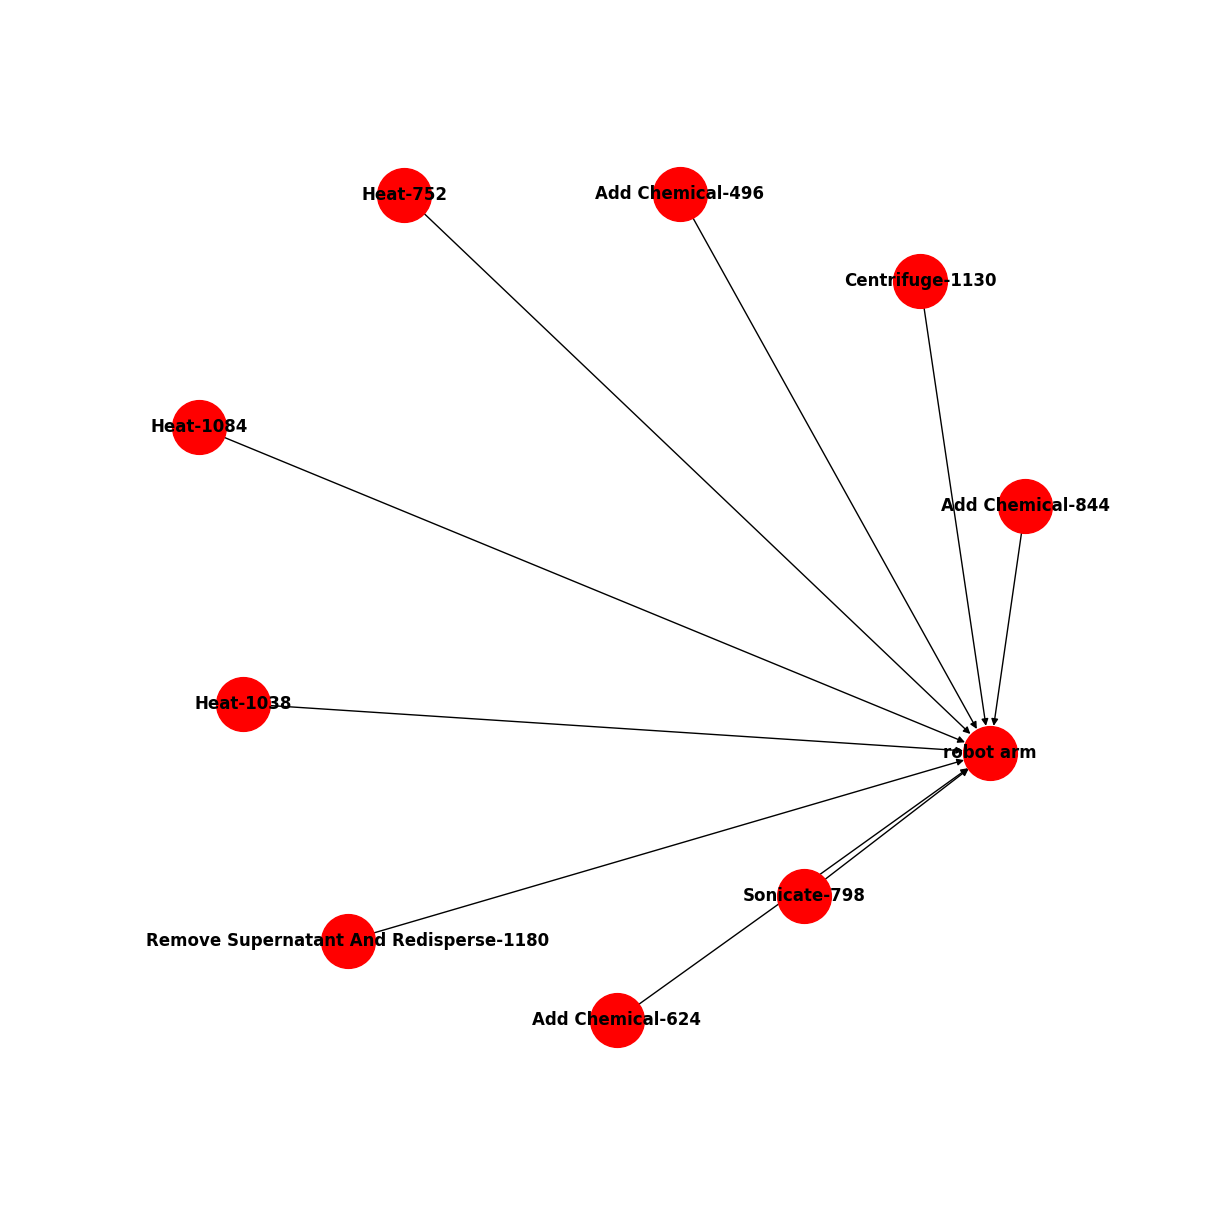

In [4]:
kg_df = pd.read_csv("./Knowledge_Graph.csv", sep='\t', dtype=str)

kg_df_filtered = kg_df.query('edge=="has_property" & target=="robot arm"')
G=nx.from_pandas_edgelist(kg_df_filtered, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G, k=3)
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')

axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])

plt.show()

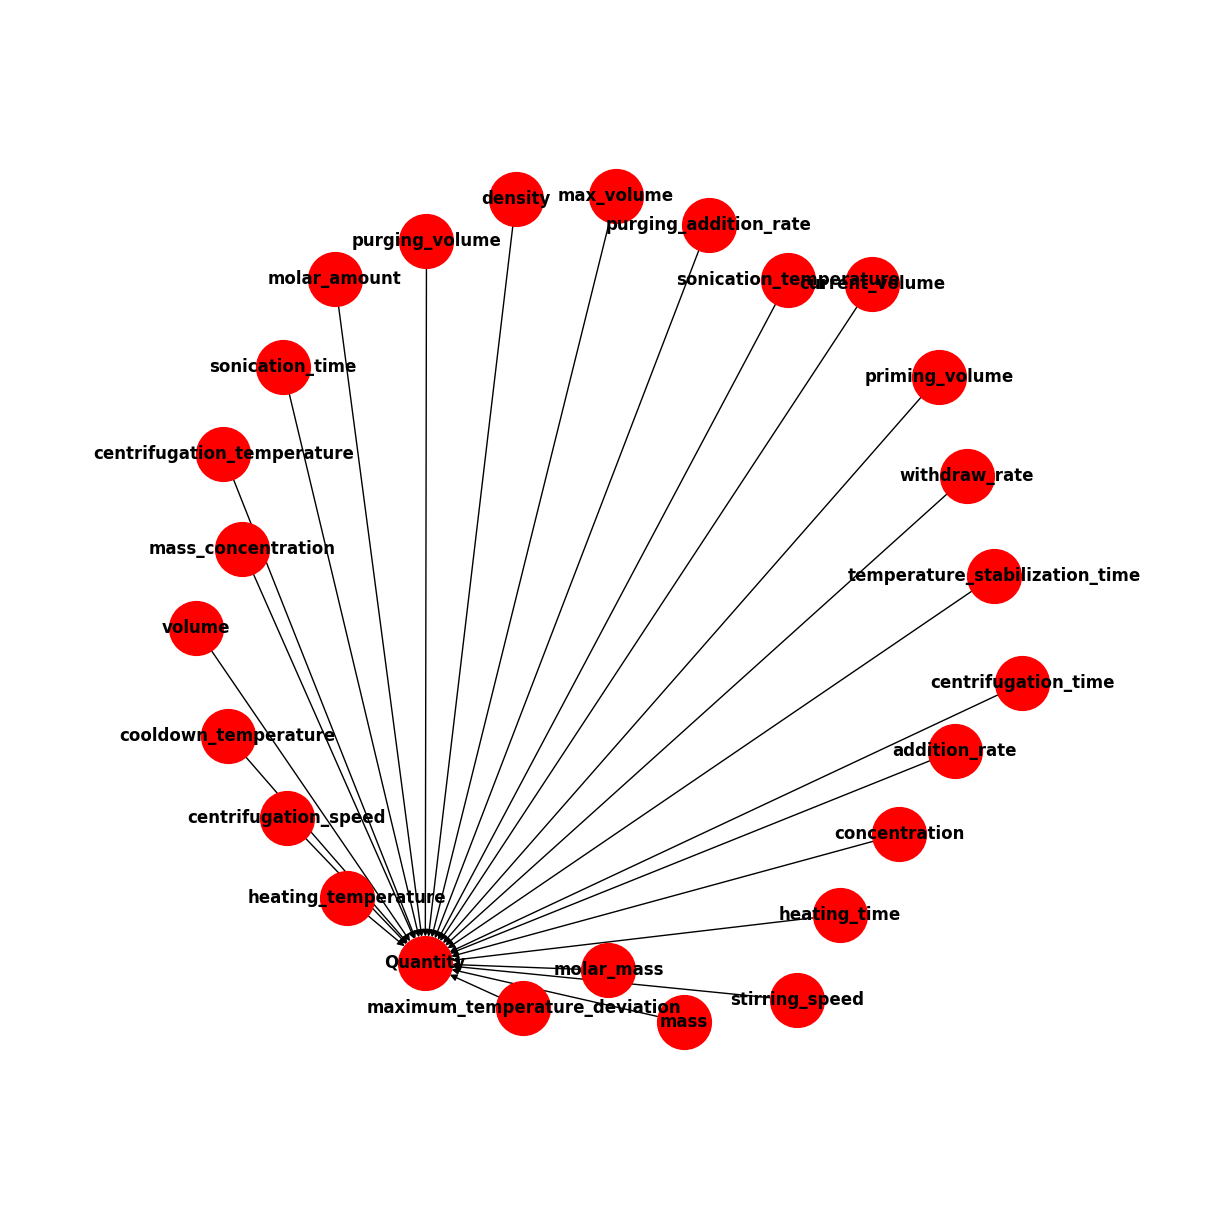

In [5]:
kg_df_filtered = kg_df.query('edge=="is_a" & target=="Quantity"')
G=nx.from_pandas_edgelist(kg_df_filtered, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G, k=10) # nx.fruchterman_reingold_layout(G, k=0.5)  
pos = nx.spring_layout(G, k=10)
nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')

axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])

plt.show()

# Graph Analysis

In [6]:
kg_df = pd.read_csv("./Knowledge_Graph.csv", sep='\t', dtype=str)
G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
pos = nx.fruchterman_reingold_layout(G, k=0.5)  # nx.spring_layout(G)


num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Ratio edges to nodes: {round(num_edges / num_nodes, 2)}')

degree_centrality = nx.degree_centrality(G)
degree_centrality = {k: v for k, v in sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True)}

betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse = True)}

closeness_centrality = nx.closeness_centrality(G)
closeness_centrality = {k: v for k, v in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse = True)}


Number of nodes: 490
Number of edges: 723
Ratio edges to nodes: 1.48


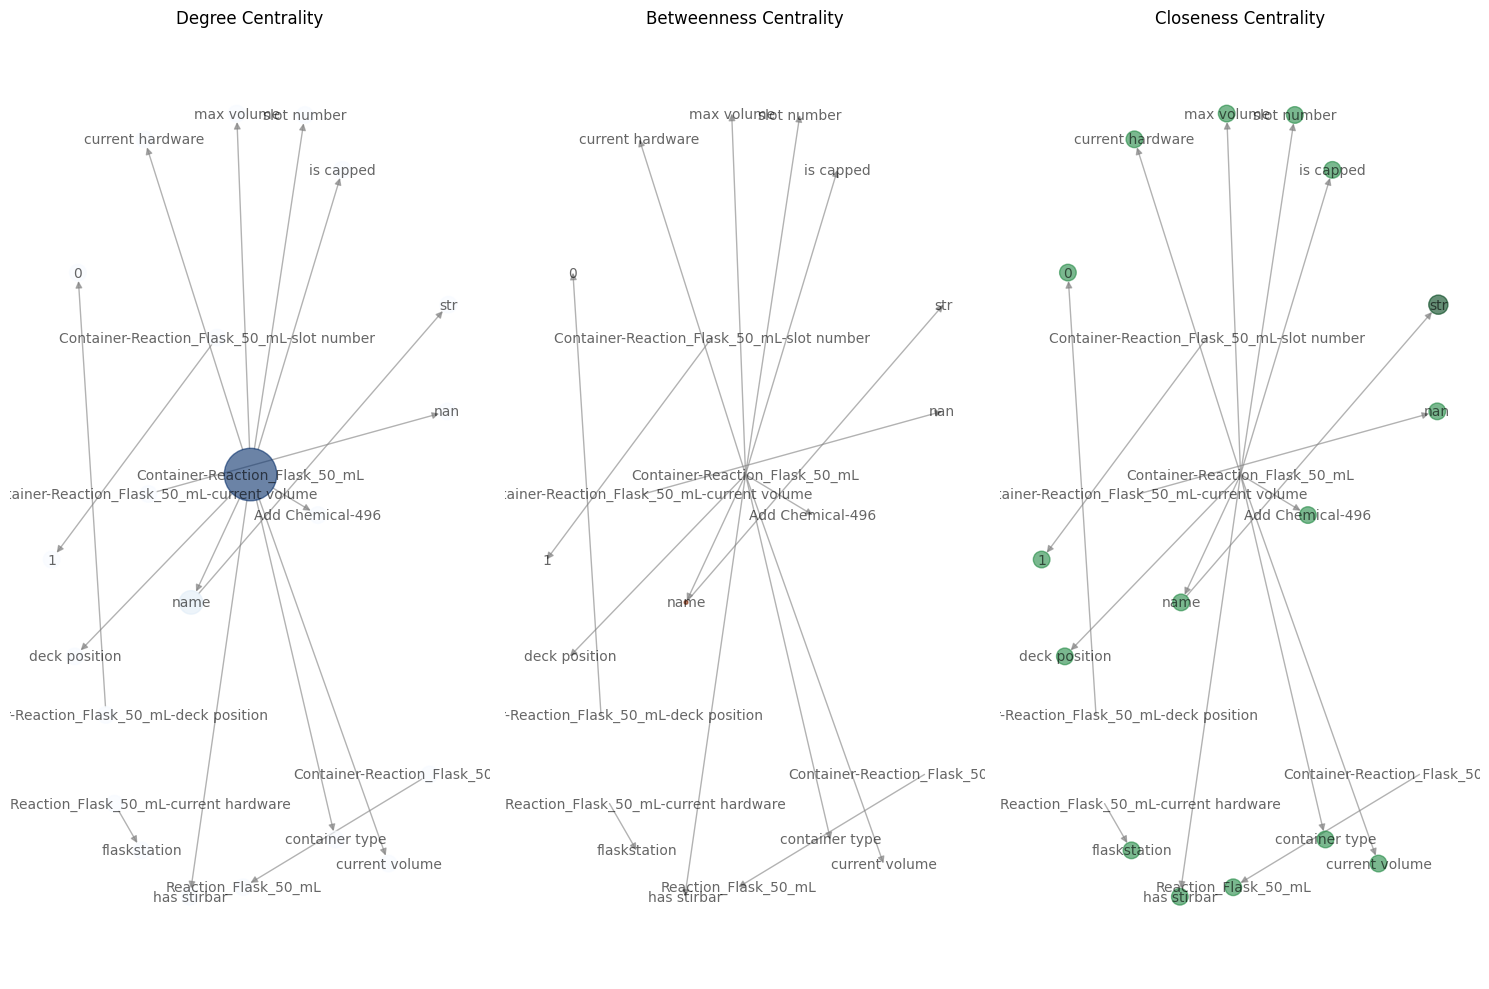

In [7]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
max_entries = 15

# Visualize centrality measures
plt.figure(figsize=(15, 10))

# Degree centrality
mask = kg_df['source'].isin(list(degree_centrality.keys())[:max_entries])
G=nx.from_pandas_edgelist(kg_df[mask], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
degree_centrality = nx.degree_centrality(G)
plt.subplot(131)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in list(degree_centrality.values())], node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, edge_color='gray', alpha=0.6)
plt.title('Degree Centrality')

# Betweenness centrality
mask = kg_df['source'].isin(list(betweenness_centrality.keys())[:max_entries])
G=nx.from_pandas_edgelist(kg_df[mask], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
betweenness_centrality = nx.betweenness_centrality(G)
plt.subplot(132)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in list(betweenness_centrality.values())], node_color=list(betweenness_centrality.values()), cmap=plt.cm.Oranges, edge_color='gray', alpha=0.6)
plt.title('Betweenness Centrality')

# Closeness centrality
mask = kg_df['source'].isin(list(closeness_centrality.keys())[:max_entries])
G=nx.from_pandas_edgelist(kg_df[mask], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
closeness_centrality = nx.closeness_centrality(G)
plt.subplot(133)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in list(closeness_centrality.values())], node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, edge_color='gray', alpha=0.6)
plt.title('Closeness Centrality')

plt.tight_layout()
plt.show()

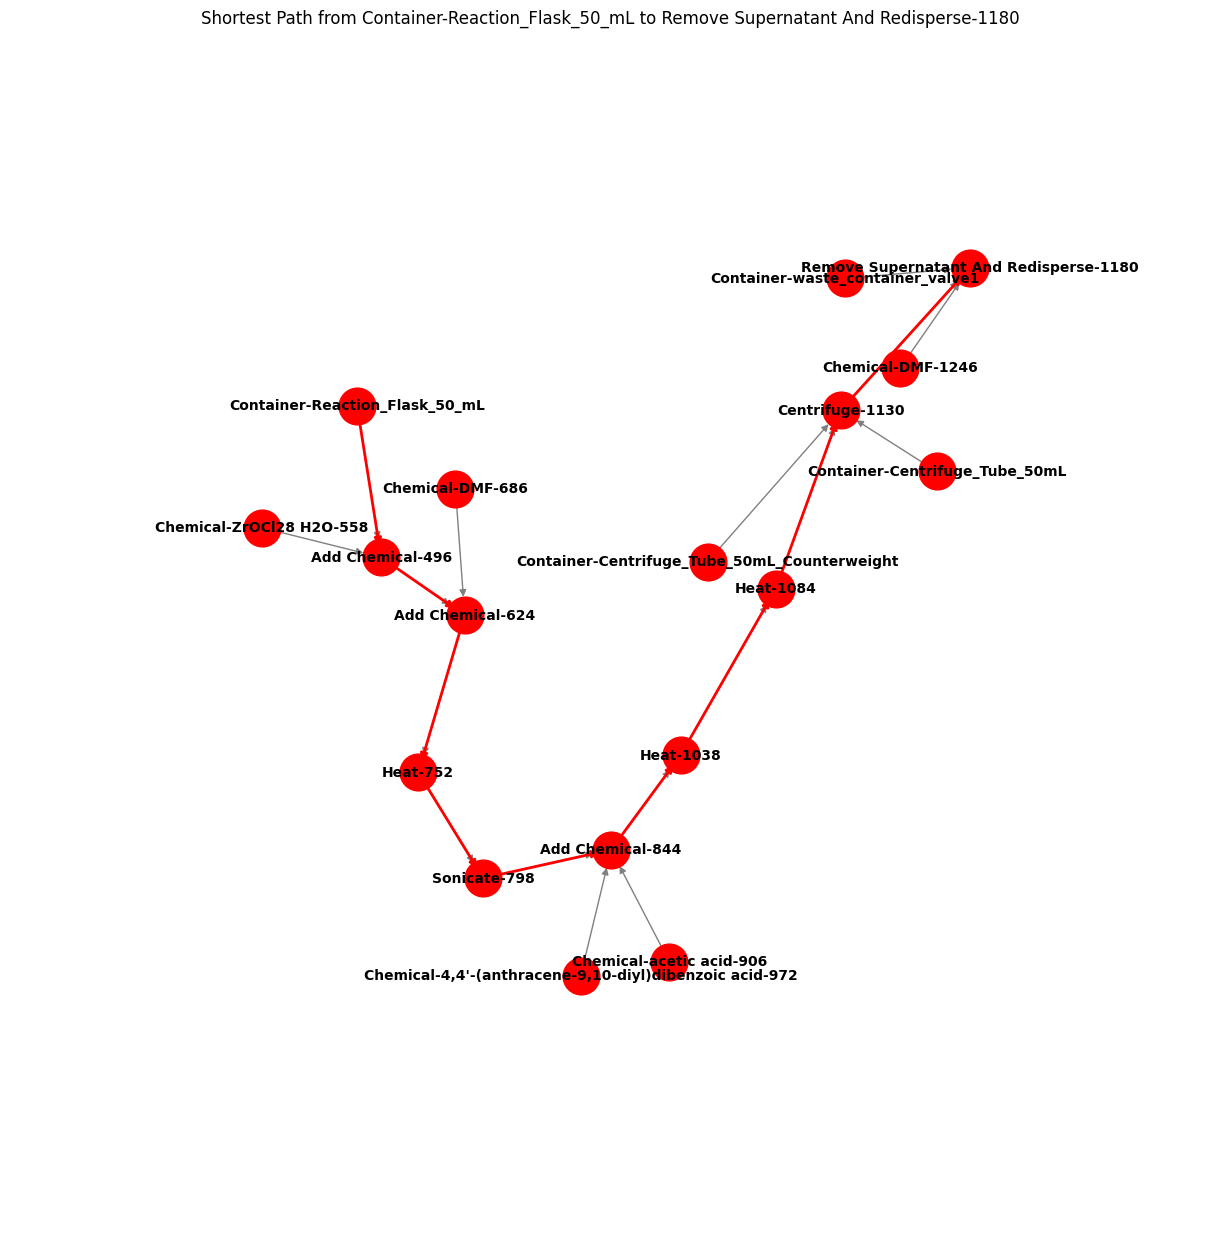

Shortest Path: ['Container-Reaction_Flask_50_mL', 'Add Chemical-496', 'Add Chemical-624', 'Heat-752', 'Sonicate-798', 'Add Chemical-844', 'Heat-1038', 'Heat-1084', 'Centrifuge-1130', 'Remove Supernatant And Redisperse-1180']


In [8]:
source_node = 'Container-Reaction_Flask_50_mL'
target_node = 'Remove Supernatant And Redisperse-1180'

kg_df = pd.read_csv("./Knowledge_Graph.csv", sep='\t', dtype=str)
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="is_used_by"], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
pos = nx.fruchterman_reingold_layout(G, k=0.4)  # nx.spring_layout(G)

# Find the shortest path
shortest_path = nx.shortest_path(G, source=source_node, target=target_node)

# Visualize the shortest path
plt.figure(figsize=(12, 12))
path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='red', edge_color='gray', alpha=1.0, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title(f'Shortest Path from {source_node} to {target_node}')

axis = plt.gca()
axis.set_xlim([1.4*x for x in axis.get_xlim()])
axis.set_ylim([1.4*y for y in axis.get_ylim()])

plt.show()

print('Shortest Path:', shortest_path)
